# 04. The Scale-Free Property

## Contents

* [04.01. Introduction](#0401-introduction)
* [04.02. Power Laws and Scale-Free Networks](#0402-power-laws-and-scale-free-networks)



In [1]:
# import
import numpy as np
import scipy
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import IPython
import networkx as nx

from IPython.display import Image
%matplotlib inline

import datetime
dt = datetime.datetime.now()

print(
"""{}-{}-{} {}:{}:{}
----------------------
numpy\t\t{}
scipy\t\t{}
pandas\t\t{}
matplotlib\t{}
----------------------
ipython\t\t{}
----------------------
networkx\t{}"""
    .format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second, np.__version__, scipy.__version__, pd.__version__, matplotlib.__version__, IPython.__version__, nx.__version__))

c = {'b': '#1f77b4', 
     'o': '#ff7f0e', 
     'g': '#2ca02c', 
     'r': '#d62728', 
     'v': '#9467bd', 
     'br': '#8c564b', 
     'p': '#e377c2', 
     'gr': '#7f7f7f', 
     'y': '#bcbd22', 
     'c': '#17becf'}

2019-6-20 19:56:39
----------------------
numpy		1.16.4
scipy		1.1.0
pandas		0.24.1
matplotlib	3.0.0
----------------------
ipython		7.2.0
----------------------
networkx	2.2


## 04.01. Introduction

## 04.02. Power Laws and Scale-Free Networks

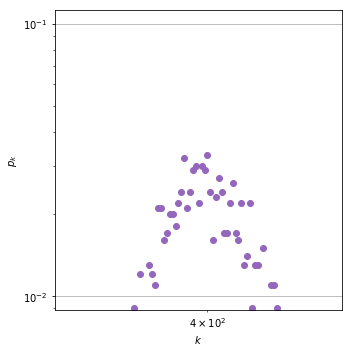

In [13]:
N, p = 1000, .4

# G = nx.gnp_random_graph(N, p, seed=123)
# p_k_arr = nx.degree_histogram(G)
# p_ks = [p/N for p in p_k_arr]
# ks = range(len(p_k_arr))

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(ks, p_ks, c=c['v'])


ax.set(xscale='log', 
       yscale='log', 
       xlabel=r'$k$', 
       ylabel=r'$p_k$',
       xlim=(350, 450),
#        ylim=(0, )
       yticks=( 10**(np.linspace(-2, -1, 5)) )
      )
ax.grid(True)
# ax.

plt.tight_layout()
plt.show()

In [5]:
def plot(N, p, seedN):
    G = nx.gnp_random_graph(N, p, seed=seedN)
    p_k_arr = nx.degree_histogram(G)
    p_ks = [p/N for p in p_k_arr]
    ks = range(len(p_k_arr))
    
    fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
    
    nx.draw_networkx(G, ax=ax[0], pos=nx.spring_layout(G), node_size=20, node_color=c[4], with_labels=False, alpha=.3)
    ax[0].set(xticks=(), yticks=())
    
    ax[1].scatter(ks, p_ks, c=c[4], alpha=.5)
    ax[1].set(xlabel=r'$k$', 
              ylabel=r'$p_k$', 
              xlim=(0, N-1), 
              #ylim(0, .020)
             )
    #xscale='log', yscale='log')
    ax[1].grid(True)
    
    plt.tight_layout()
    plt.show()

from ipywidgets import interactive
interactive_plot = interactive(plot, N=(1, 1000, 10), p=(0, 1, 0.1), seedN=(1, 999, 1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=491, description='N', max=1000, min=1, step=10), FloatSlider(value=0.0, …

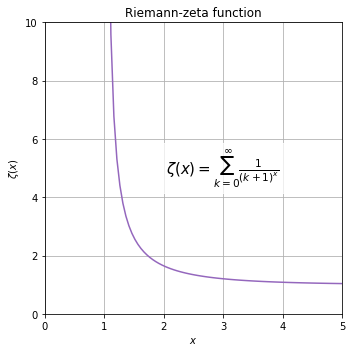

In [7]:
from scipy.special import zeta

xmax, ymax = 5, 10

x = np.linspace(0, xmax, 100)
zetas = zeta(x)

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(x, zetas, c=c[4])

ax.text(xmax/2+1/2, ymax/2, 
        r'$\zeta(x) = \sum_{k=0}^\infty{\frac{1}{(k+1)^x}}$', 
        fontsize=15, ha='center', va='center', 
        bbox=dict(fc='white', ec='white', alpha=0.75))

# ax.legend(loc='best')
ax.set(title='Riemann-zeta function', 
       xlabel=r'$x$', 
       ylabel=r'$\zeta(x)$',
       xlim=(0, xmax),
       ylim=(0, ymax)
      )
ax.grid(True)

plt.tight_layout()
# plt.savefig('fig/fig_Riemann-zeta.png')
plt.show()

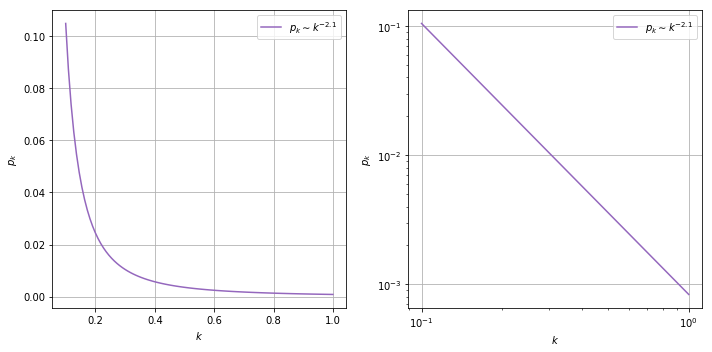

In [8]:
gamma = -2.1
def scale_free_pk(k, gamma):
    return k**(gamma) /1200

ks = np.linspace(0.1, 1, 100)
ps = scale_free_pk(ks, gamma)

fig, ax = plt.subplots(figsize=(10, 5), ncols=2, nrows=1)
ax[0].plot(ks, ps, label=r'$p_k \sim k^{-2.1}$', c=c[4])
ax[0].set(xlabel=r'$k$', 
          ylabel=r'$p_k$'
         )
ax[0].grid(True)
ax[0].legend(loc='best')

ax[1].plot(ks, ps, label=r'$p_k \sim k^{-2.1}$', c=c[4])
ax[1].set(xlabel=r'$k$',
          ylabel=r'$p_k$',
          xscale='log',
          yscale='log'
         )
ax[1].grid(True)
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

/Users/shume/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/artist.py:913: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  return func(v)


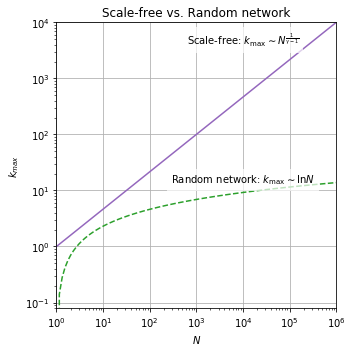

In [9]:
def random_network(N):
    return np.log(N)

def scale_free(N, gamma):
    return N**(1/(gamma - 1))

N = 10 ** np.linspace(0, 6, 100)
gamma = 2.5

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(N, random_network(N), label=('Random network'), c=c[2], linestyle='--')
ax.plot(N, scale_free(N, gamma), label=('Scale-free'), c=c[4])

ax.text(10**4, random_network(10**5.1), ('Random network: ' r'$k_{\max} \sim \ln{N}$'), ha='center', va='bottom', bbox=dict(fc='white', ec='none', alpha=.7))
ax.text(10**4, scale_free(10**5.3, gamma), ('Scale-free: ' r'$k_{\max} \sim N^{\frac{1}{\gamma - 1}}$'), ha='center', va='bottom', bbox=dict(fc='white', ec='none', alpha=.7))

ax.set(title='Scale-free vs. Random network',
       xscale='log',
       yscale='log',
       xlabel=r'$N$',
       ylabel=r'$k_{max}$',
       xlim=(1, 10**6),
       ylim=(0, 10**4)
      )

ax.grid(True)
# ax.legend('best')

plt.tight_layout()
# plt.savefig('fig/fig0405.png')
plt.show()